In [1]:
# Mathematical foundations of neural nets
# Show netral networks representing a 1-d function f: R -> R
# Train neural networks on samples of the functions -- regression
# Start with linear networks only with linear activations
# Then explore networks with relu activations and see how they fit 
# Nicholas Miller (2023) In Jupyter Notebooks with Keras and Pyplot


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [102]:
# Set up samples for training and test sets
# Training samples from the domain
# Start label with simple linear funxtion y = 0.8 * x
X_train = [[x/199. - 0.5] for x in range(200)]
linear_Y_train = [[0.8 * x_i[0]] for x_i in X_train]

X_test = [[x/199. + .0025 - 0.5] for x in range(0, 200, 10)]
X_test_extra = [[x_i[0] + 0.4] for x_i in X_test]


Text(0.5, 1.0, 'Training data x,y')

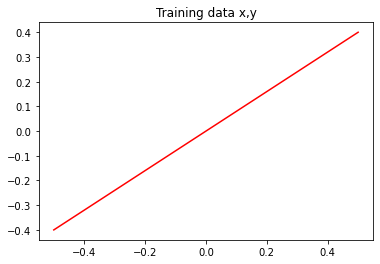

In [110]:
# Show the training data X, Y
plt.plot(X_train, linear_Y_train, 'r-')
plt.title('Training data x,y')

In [103]:
# Obviously use a linear model to predict a linear function
# Model is still linear no matter how many layers since all activations are linear
linear_model = Sequential()
linear_model.add(Dense(5, input_dim=1, activation='linear'))
linear_model.add(Dense(1, activation='linear'))
linear_model.compile(loss='mean_squared_error', optimizer='adam')


In [104]:
# Fix the linear function with a linear model
linear_model.fit(X_train, linear_Y_train, epochs=250, shuffle=True, verbose=0)


In [105]:
# See how the fit worked by prediction the function on the test set
linear_Y_predict = linear_model.predict(X_test)


Text(0.5, 1.0, 'Linear model fit')

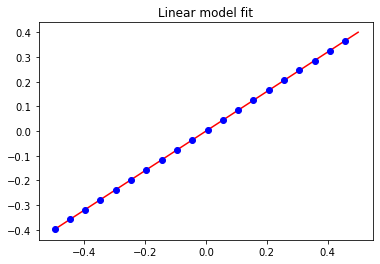

In [111]:
# plot prediction (blue) vs actual function (red line)
plt.plot(X_train, linear_Y_train, 'r-')
plt.plot(X_test, linear_Y_predict, 'bo')
plt.title('Linear model fit')

In [52]:
# If we try a linear model on a quadratic dataset -- the output will still be linear no matter the data
# It underfits
try_linear_model = Sequential()
try_linear_model.add(Dense(5, input_dim=1, activation='linear'))
try_linear_model.add(Dense(1, activation='linear'))
try_linear_model.compile(loss='mean_squared_error', optimizer='adam')

quadratic_Y_train = [[(x_i[0]-0.1)**2] for x_i in X_train]
try_linear_model.fit(X_train, quadratic_Y_train, epochs=250, shuffle=True, verbose=0)
try_quadratic = try_linear_model.predict(X_test)

Text(0.5, 1.0, 'Linear model to quadratic data')

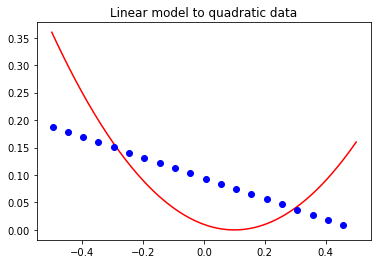

In [112]:

plt.plot(X_train, quadratic_Y_train, 'r-')
plt.plot(X_test, try_quadratic, 'bo')
plt.title('Linear model to quadratic data')

In [178]:
# Lets use relu activations
# Obviously one node with one relu activation trivially learns relu
relu_Y_train = [[x_i[0] if x_i[0] > 0 else 0.] for x_i in X_train]
relu_model = Sequential()
relu_model.add(Dense(1, input_dim=1, activation='relu'))
relu_model.add(Dense(1, activation='linear'))
relu_model.compile(loss='mean_squared_error', optimizer='adam')

relu_model.fit(X_train, relu_Y_train, epochs=700, batch_size=200, shuffle=True, verbose=0)

Text(0.5, 1.0, 'RELU model to RELU data')

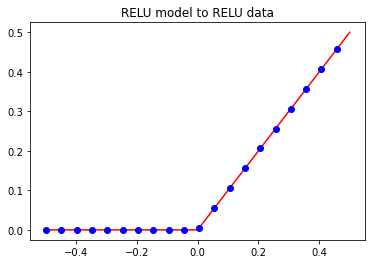

In [179]:
relu_predict = relu_model.predict(X_test)
plt.plot(X_train, relu_Y_train, 'r-')
plt.plot(X_test, relu_predict, 'bo')
plt.title('RELU model to RELU data')

In [239]:
trelu_Y_train = [[1 - x_i[0] if x_i[0] < 0. else 1.] for x_i in X_train]
trelu_model = Sequential()
trelu_model.add(Dense(4, input_dim=1, activation='relu'))
trelu_model.add(Dense(1, activation='linear'))
trelu_model.compile(loss='mean_squared_error', optimizer='adam')

trelu_model.fit(X_train, trelu_Y_train, epochs=700, batch_size=200, shuffle=True, verbose=0)

Text(0.5, 1.0, 'RELU model with trivially transformed RELU data')

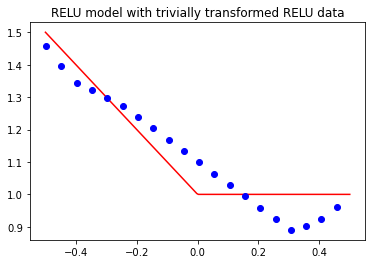

In [240]:
trelu_predict = trelu_model.predict(X_test)
plt.plot(X_train, trelu_Y_train, 'r-')
plt.plot(X_test, trelu_predict, 'bo')
plt.title('RELU model with trivially transformed RELU data')

In [220]:
# now use multi-layered relu network to learn the quadratic we failed at before
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
model.add(Dense(30, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, quadratic_Y_train, epochs=500, batch_size=200, verbose=0)


Text(0.5, 1.0, 'Deep RELU model with quadratic data')

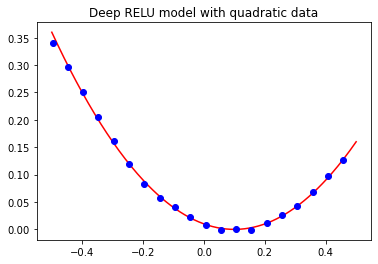

In [221]:
# predict based on the fitted quadratic
quadratic = model.predict(X_test)
plt.plot(X_train, quadratic_Y_train, 'r-')
plt.plot(X_test, quadratic, 'bo')
plt.title('Deep RELU model with quadratic data')

Text(0.5, 1.0, 'Deep RELU model extrapolating from quadratic data')

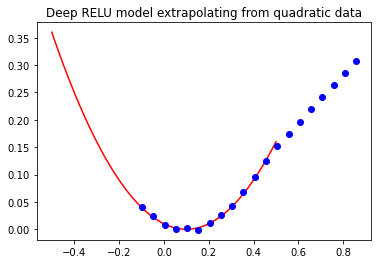

In [222]:
# see how well the function axtrapolates by predicint outside the bounds of the samples
quadratic_extra = model.predict(X_test_extra)
plt.plot(X_train, quadratic_Y_train, 'r-')
plt.plot(X_test_extra, quadratic_extra, 'bo')
plt.title('Deep RELU model extrapolating from quadratic data')

In [135]:
# now try a bigger relu network and even more complex function -- sin(x)

from math import sin
from math import pi
sin_Y_train = [[sin(x_i[0] * 4*pi) * 0.5 + 0.5] for x_i in X_train]

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, sin_Y_train, epochs=750, batch_size=200, shuffle=True, verbose=0)

Text(0.5, 1.0, 'Deeper RELU model with sinusoidal data')

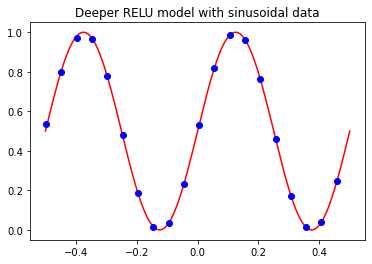

In [136]:
# predict on a model fitted to sin

mysin = model.predict(X_test)
plt.plot(X_train, sin_Y_train, 'r-')
plt.plot(X_test, mysin, 'bo')
plt.title("Deeper RELU model with sinusoidal data")

Text(0.5, 1.0, 'Deeper RELU model extrapulating from sinusoidal data')

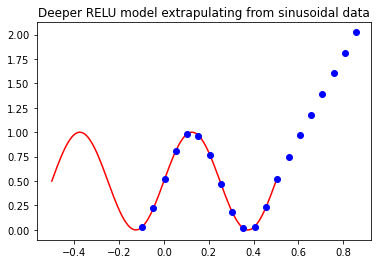

In [137]:
# see how sin extrapolates outside of the sample domain
sin_extra = model.predict(X_test_extra)
plt.plot(X_train, sin_Y_train, 'r-')
plt.plot(X_test_extra, sin_extra, 'bo')
plt.title("Deeper RELU model extrapulating from sinusoidal data")